# Computational Appendix

This notebook is an attempt at creating Julia version of codes in the [computational appendix](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/web-appendix.pdf) of the book [Chemical Reactor Analysis and Design by Rawlings and Ekerdt](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/)

In [1]:
using Gadfly

## A.1 Linear Algebra and Least Squares

In [2]:
stoi = [0 1 0 -1 -1 1;
        -1 1 1 -1 0 0;
         1 0 -1 0 -1 1]

3×6 Array{Int64,2}:
  0  1   0  -1  -1  1
 -1  1   1  -1   0  0
  1  0  -1   0  -1  1

In [3]:
rank(stoi)

2

In [4]:
r = [1;2;3]

3-element Array{Int64,1}:
 1
 2
 3

In [5]:
R = stoi' * r

6-element Array{Int64,1}:
  1
  3
 -1
 -3
 -4
  4

### Example A.1

In [6]:
stoi = [0 1 0 -1 -1 1; -1 1 1 -1 0 0]

2×6 Array{Int64,2}:
  0  1  0  -1  -1  1
 -1  1  1  -1   0  0

In [7]:
nr, nspec = size(stoi)

(2,6)

In [8]:
r = [1;2]

2-element Array{Int64,1}:
 1
 2

In [9]:
R = stoi' * r

6-element Array{Int64,1}:
 -2
  3
  2
 -3
 -1
  1

In [10]:
nmeas = 2000
R_meas = zeros(nspec,nmeas)
for i in 1:nmeas
    R_meas[:,i] = 0.05 * randn(nspec) + R ;
end

In [11]:
R_meas

6×2000 Array{Float64,2}:
 -1.97363  -2.04936   -2.02408  -2.01709   …  -1.9814    -2.04377   -2.02201
  2.9377    2.95957    3.00831   2.9038        2.96817    2.95613    3.0063 
  2.06795   2.01288    1.99989   2.00581       1.99963    2.08819    1.99825
 -2.99604  -2.97167   -2.9426   -2.96718      -2.98232   -2.92275   -2.93242
 -1.00083  -0.943551  -1.05704  -0.944201     -0.975825  -1.02663   -0.89749
  1.02888   0.991243   1.02773   0.938812  …   0.982936   0.980573   1.04598

In [12]:
r_est = stoi' \ R_meas

2×2000 Array{Float64,2}:
 0.99193  0.956431  1.01608  0.935684  …  0.981163  0.960221  0.967567
 1.99786  2.02015   1.98568  2.00563      1.9923    2.0226    2.00596 

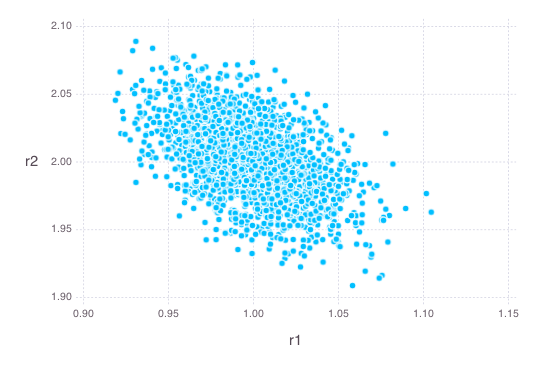

In [13]:
plot(x = r_est[1,:], y = r_est[2,:], Guide.xlabel("r1"), Guide.ylabel("r2"))

## A.2 Nonlinear Algebraic Equations

In [28]:
function dgdx!(x, residual)
    K1 = 108
    K2 = 284
    P = 2.5
    yI0 = 0.5
    yB0 = 0.5
    yP10 = 0.0
    yP20 = 0.0
    d = 1 - x[1] - x[2]
    yI = (yI0 - x[1] - x[2])/d
    yB = (yB0 - x[1] - x[2])/d
    yP1 = (yP10 + x[1])/d
    yP2 = (yP20 + x[2])/d
    
    residual[1] = P*K1*yI*yB - yP1
    residual[2] = P*K2*yI*yB - yP2
    
end

dgdx! (generic function with 1 method)

In [29]:
# initial guess
x0 = [0.2, 0.2]

2-element Array{Float64,1}:
 0.2
 0.2

In [42]:
residual = [0;0]
dgdx!(x0,residual)
residual

LoadError: LoadError: InexactError()
while loading In[42], in expression starting on line 2

In [31]:
using NLsolve

In [43]:
nlsolve(dgdx!,x0)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.2,0.2]
 * Zero: [0.133357,0.350679]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [33]:
using Sundials

In [40]:
res = Sundials.kinsol(dgdx!, x0)

2-element Array{Float64,1}:
 0.133357
 0.350679

LoadError: LoadError: InexactError()
while loading In[37], in expression starting on line 1